In [1]:
%matplotlib inline
import pandas as pd

# Load Data

In [2]:
returns = pd.read_csv('Inputs.csv')
returns['Date'] = pd.to_datetime(returns['Date'])
returns.set_index('Date',inplace=True)
returns.head()

,CDIAnnual,Master
Date,,
2012-02-29,0.0000,0.000000
2012-03-01,0.1027,-0.003936
2012-03-02,0.1027,0.009299
2012-03-05,0.1026,0.004825
2012-03-06,0.1026,-0.005493


# Simulation Parameters


In [3]:
initialAUM = 1e8

initialAllocation = {
    'Master' : 0.08,
    'IssuerA' : 0.1,
    'IssuerB' : 0.05,
    'IssuerC' : 0,
    'CreditFund' : 0.2,
    'DPGE' : 0.2,
}

# Annual Fees
Fee = {
    'Adm' : 0.008,
    'Performance' : 0.15,
}

#Percentage of Annual CDI

ReturnRates = {
    'IssuerA' : 1.05,
    'IssuerB' : 1.1,
    'IssuerC' : 1.2,
    'CreditFund' : 1.045,
    'DPGE' : 1.07,
    'Cash' : 0.999,
}

In [4]:
returns['CDI'] = (returns['CDIAnnual'] + 1.0) ** (1.0/252.0) - 1.0

for asset in ReturnRates.keys():
    returns[asset] = (returns['CDIAnnual'] * ReturnRates[asset] + 1) ** (1/252) - 1

    
# returns['IssuerA'] = (returns['CDIAnnual'] * ReturnRates['IssuerA'] + 1) ** (1/252) - 1

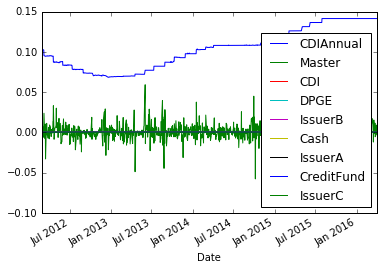

In [5]:
returns.plot()

Plan:

* Reproduce The simulation
* bootstrap the risk return series
* Reapply simulation